In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from six.moves import cPickle as pickle
from IPython.display import display, Image
import random 
from scipy.misc import imread, imresize
from sklearn.utils import shuffle
from skimage import exposure
import pickle
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform


In [2]:
def pickle_imgs(X, labels, names, class_name, force):
    file_name=class_name+'.pickle'
    if os.path.exists(file_name) and not force:
        print('pickle file %s exists'%(file_name))
    else:
        data={'img':X, 'labels':labels, 'names':names}
        with open(file_name, 'wb') as handle:
            pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print('pickeled %s'%(file_name))
    return 

In [3]:
root=r"C:/Users/STEVE/Desktop/data/signal images/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images"
class_folders = os.listdir(root)
num_pix=32
num_color=3
force=False
for class_folder in class_folders:
    file_name=class_folder+'.pickle'
    if os.path.exists(file_name) and not force:
        print('1-pickle file %s exists'%(file_name))
        continue
    temp_X=np.empty([0,num_pix, num_pix,num_color], dtype=np.int32)
    temp_labels=np.empty([0])
    temp_names=np.empty([0])
    class_path=os.path.join(root,class_folder)
    images=os.listdir(class_path)
    for image in images:
        ftype=image.split(".")[-1]
        if ftype=='ppm': 
            img_path=os.path.join(class_path,image)
            img=imread(img_path)
            newimg=imresize(img, (32,32,3))    
            newlabel=int(class_folder)
            temp_X=np.append(temp_X,[newimg], axis=0 )
            temp_labels=np.append(temp_labels,newlabel )
            temp_names=np.append(temp_names,image )
    pickle_imgs(temp_X, temp_labels, temp_names, class_folder, force)

1-pickle file 00000.pickle exists
1-pickle file 00001.pickle exists
1-pickle file 00002.pickle exists
1-pickle file 00003.pickle exists
1-pickle file 00004.pickle exists
1-pickle file 00005.pickle exists
1-pickle file 00006.pickle exists
1-pickle file 00007.pickle exists
1-pickle file 00008.pickle exists
1-pickle file 00009.pickle exists
1-pickle file 00010.pickle exists
1-pickle file 00011.pickle exists
1-pickle file 00012.pickle exists
1-pickle file 00013.pickle exists
1-pickle file 00014.pickle exists
1-pickle file 00015.pickle exists
1-pickle file 00016.pickle exists
1-pickle file 00017.pickle exists
1-pickle file 00018.pickle exists
1-pickle file 00019.pickle exists
1-pickle file 00020.pickle exists
1-pickle file 00021.pickle exists
1-pickle file 00022.pickle exists
1-pickle file 00023.pickle exists
1-pickle file 00024.pickle exists
1-pickle file 00025.pickle exists
1-pickle file 00026.pickle exists
1-pickle file 00027.pickle exists
1-pickle file 00028.pickle exists
1-pickle file 

In [4]:
def read_pickles(path, num_pix, num_color):
    x=np.empty([0,num_pix, num_pix,num_color], dtype=np.uint8)
    l=np.empty([0])
    files = os.listdir(path)
    for file in files:
        file_type=file.split(".")[-1]
        if file_type=='pickle':
            with open(file, 'rb') as handle:
                d = pickle.load(handle)
            x=np.append(x,d['img'], axis=0 )
            l=np.append(l,d['labels'], axis=0 )
    return x, l
            
X,labels=read_pickles(r"C:\Users\STEVE\Neural Network-German Signals", 32, 3)

In [82]:
def get_class_sample(X, labels):
    sample_images=np.empty([0,32, 32,3], dtype=np.uint8)
    for i in np.unique(labels):
        ind=np.argwhere(labels==i).reshape(-1)[0]
        sample=X[ind,:,:,:].astype(np.uint8)
        sample_images=np.append(sample_images,[sample], axis=0 )
    return sample_images
sample_images=get_class_sample(X, labels)

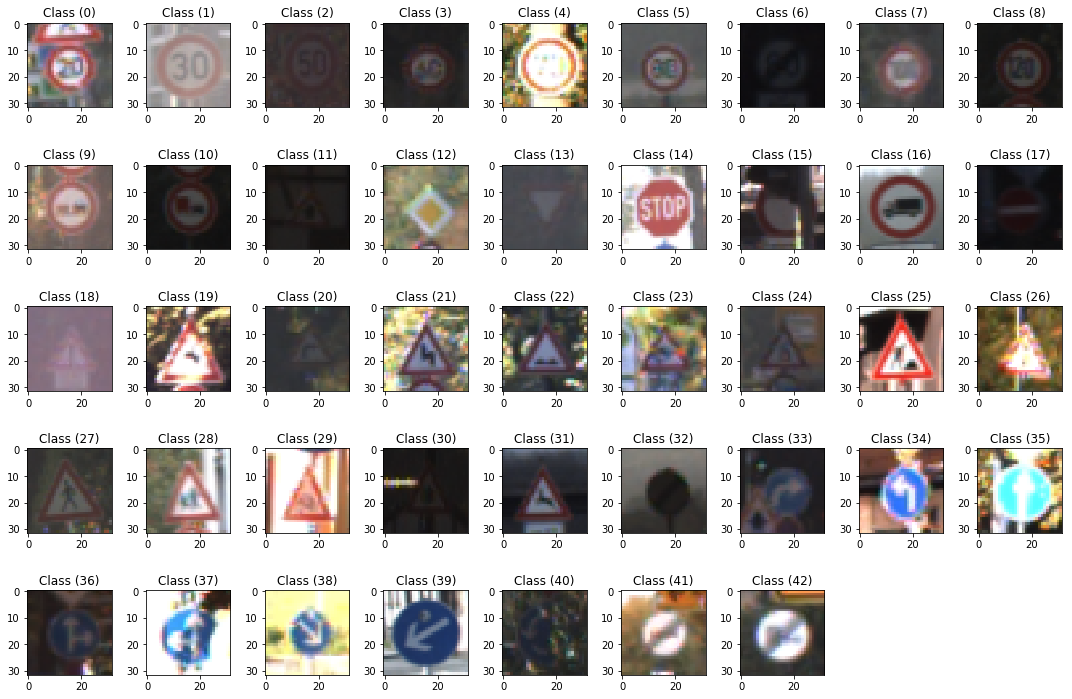

In [83]:
def display_class_samples(class_samples, cols):
    fig = plt.figure(figsize=(15,10))
    n_image=len(class_samples)
    titles = ['Class (%d)' % i for i in range(0,n_image )]
    for n, (sample, title) in enumerate(zip(sample_images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_image/float(cols)), n + 1)
        plt.imshow(sample)
        a.set_title(title)
    plt.tight_layout()
    plt.show()
display_class_samples(sample_images, 5)

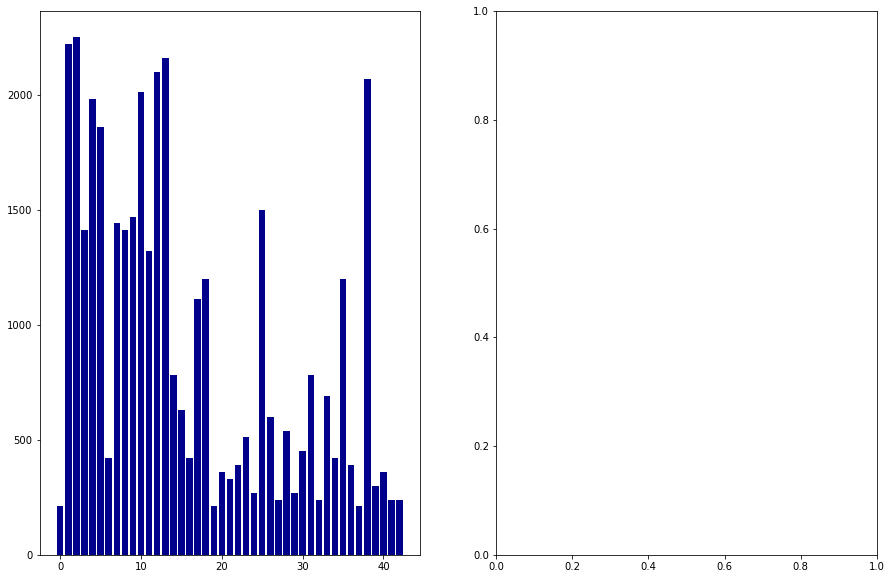

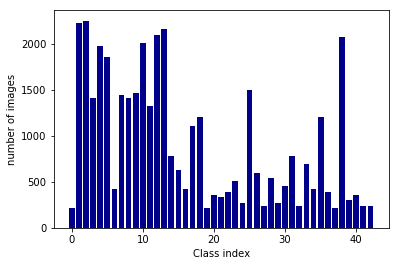

In [149]:
def get_frequency(labels):
    num_class=43
    count=[]
    for i in range(num_class):
        size=labels[labels==i].shape[0]
        count.append(size)
    return count

c=get_frequency(labels)
fig, ax=plt.subplots(1,1)
ax.bar(np.unique(labels), np.array(c), color='darkBlue')
ax.set_xlabel('Class index')
ax.set_ylabel('number of images')
plt.show()    
    

In [114]:
def mirror_single_class(M,l, mirror_type):
    if mirror_type=='h':  return M[:, :, ::-1, :], np.repeat(l,M.shape[0])
    elif mirror_type=='v': return M[:, ::-1, :, :], np.repeat(l,M.shape[0])
    elif mirror_type=='hv': return M[:, ::-1, ::-1, :], np.repeat(l,M.shape[0])
    else: 
        Print("inappropriate mirror_type. It has to be either 'h', 'v', or 'hv ")
        return 


def mirror_multiple_classes(X,labels, class_list, mirror_type):
    X_=np.empty([0,32, 32,3], dtype=np.float32)
    labels_=np.empty([0])
    if mirror_type!='xh':
        for i in class_list:
            mirrored, mirror_label=mirror_single_class(X[labels==i],i, mirror_type)
            X_=np.append(X_,mirrored, axis=0)
            labels_=np.append(labels_,mirror_label, axis=0)
    else: 
        for pair in class_list:
            mirrored, mirror_label=mirror_single_class(X[labels==pair[0]],pair[1], 'h')
            xmirrored, xmirror_label=mirror_single_class(X[labels==pair[1]],pair[0], 'h')
            X_=np.append(X_,mirrored, axis=0)
            labels_=np.append(labels_,mirror_label, axis=0)
            X_=np.append(X_,xmirrored, axis=0)
            labels_=np.append(labels_,xmirror_label, axis=0)
            
    return X_, labels_




In [116]:
h_symmetric = [11, 12, 13, 15, 17, 18, 22, 26, 30, 35]
v_symmetric = [1, 5, 12, 15, 17]
hv_symmetric = [32, 40]
x_symmetric = [[19, 20], [33, 34], [36, 37], [38, 39] ]

x_mirrored,l_mirrored=[],[]
for class_list, mirror_type in zip([h_symmetric, v_symmetric, hv_symmetric, x_symmetric],['h','v','hv','xh']):
    out=mirror_multiple_classes(X,labels, class_list, mirror_type)
    x_mirrored.append(out[0])
    l_mirrored.append(out[1])
#hx,hl=mirror_multiple_classes(X,labels, h_symmetric, 'h')
#vx,vl=mirror_multiple_classes(X,labels, v_symmetric, 'v')
#hvx,hvl=mirror_multiple_classes(X,labels, hv_symmetric, 'hv')
#xhx,xhl=mirror_multiple_classes(X,labels, x_symmetric, 'xh')


#for x,l in zip([hx,vx,hvx], [hl,vl,hvl]):
#    X=np.append(X,x,axis=0)
#    labels=np.append(labels,l,axis=0)

In [126]:
X_mirrored=np.empty([0,32,32,3], dtype= np.int8)
labels_mirrored=np.empty([0], dtype= np.int8)
for a,b in zip(x_mirrored, l_mirrored):
    X_mirrored=np.append(X_mirrored, a, axis=0)
    labels_mirrored=np.append(labels_mirrored, b, axis=0)
    
    

(43,)

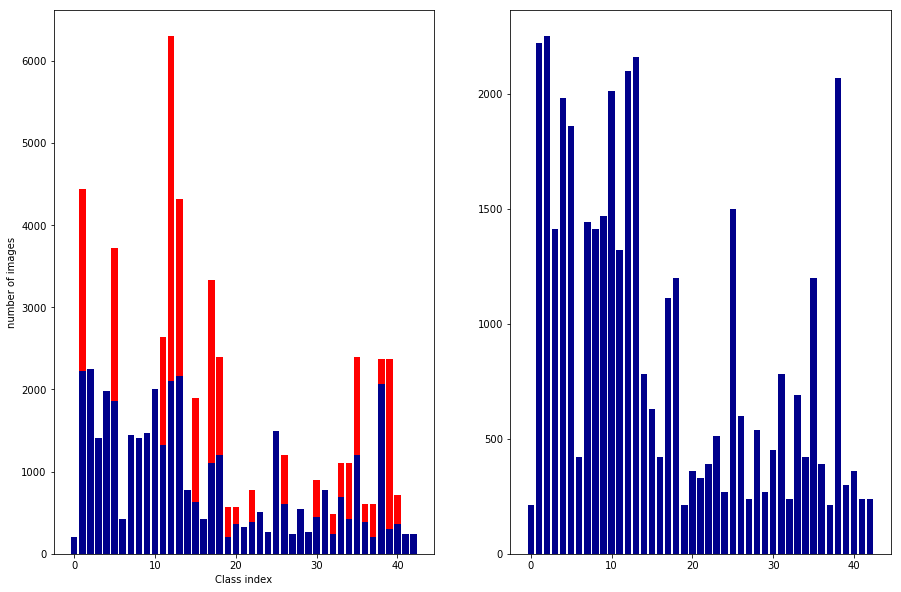

In [155]:
c=get_frequency(labels)
c_mirrored=get_frequency(labels_mirrored)
C=np.array(c)
C_mirrored=np.array(c_mirrored)
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,10))
p1=ax1.bar(np.unique(labels), c,   color='darkBlue')
p2=ax1.bar(np.unique(labels), C_mirrored,bottom=C, color='red')

ax2.bar(np.unique(labels), np.array(c),   color='darkBlue')
ax1.set_xlabel('Class index')
ax1.set_ylabel('number of images')
ax1.set_ylim=(0,5000)
ax2.set_ylim=(0,5000)
plt.show()

In [44]:
def myrotate(X, angle):
    X_rotate=np.empty([0,X.shape[1], X.shape[2],X.shape[3]], dtype=np.uint8)
    for x in X:
        ang=np.random.uniform(-angle, angle,size=1)
        x = rotate(x,ang )
        X_rotate=np.append(X_rotate,[x], axis=0)
    return X_rotate 


In [111]:
def projection_transform(X, intensity):
    image_size = X.shape[1]
    d = image_size * 0.3 * intensity
    for x in X:
        tl, bl, tr, br=([] for i in range(4))
        corner_shifts=[tl, bl, tr, br] ### represent four corners of an immage
        for corner_shift in corner_shifts:
            corner_shift.append(np.random.uniform(-d, d, size=1)) #####this is for x coordinate
            corner_shift.append(np.random.uniform(-d, d, size=1)) ####this is for y coordinate

        
        shift=np.array([tl,bl,tr,br]).reshape(4,2)
        print(shift.shape)
        destination=np.array([[0, 0],[0, image_size],[image_size, image_size], [image_size, 0]]).reshape(4,2)
        source=destination-shift
        
        transform = ProjectiveTransform()
        transform.estimate(source,destination)
        x = warp(x, transform, output_shape=(image_size, image_size), order = 1, mode = 'edge')
        
    return X

(4, 2)


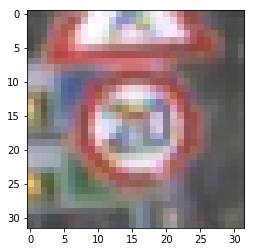

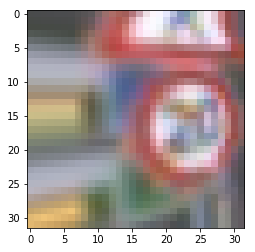

(4, 2)


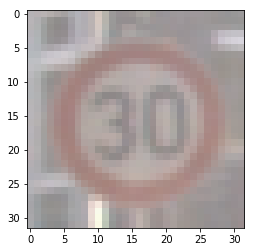

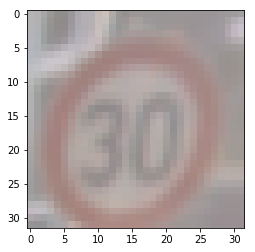

In [112]:
s=sample_images[:2]
s.shape
#h=myrotate(s,50)
h=projection_transform(s,0.75)


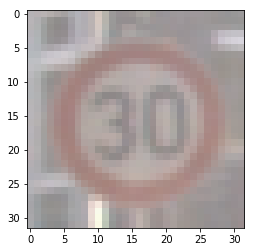

In [109]:
plt.imshow(h[1])
plt.show()

In [110]:
self_flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
self_flippable_vertically = np.array([1, 5, 12, 15, 17])
self_flippable_both = np.array([32, 40])
cross_flippable = np.array([
        [19, 20], 
        [33, 34], 
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
num_classes = 43
